In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sqlite3
import sys
import time

In [2]:
path = "../data/melee_player_database.db"

con = sqlite3.connect(path)
cur = con.cursor()

In [3]:
# Might be slightly janky
def get_column_names(table):
    cur.execute("SELECT * FROM " + table + " LIMIT 1")
    return [x[0] for x in cur.description]

def get_rows(table, num_rows):
    cur.execute("SELECT * FROM " + table + " LIMIT " + str(num_rows))
    return cur.fetchall()

In [4]:
columns = get_column_names("players")
rows = get_rows(table="players", num_rows=10 * 1000 * 1000)

players_df = pd.DataFrame(rows, columns=columns)

columns = get_column_names("ranking")
rows = get_rows(table="ranking", num_rows=10 * 1000 * 1000)

ranking_df = pd.DataFrame(rows, columns=columns)

columns = get_column_names("ranking_seasons")
rows = get_rows(table="ranking_seasons", num_rows=10 * 1000 * 1000)

ranking_seasons_df = pd.DataFrame(rows, columns=columns)

columns = get_column_names("sets")
rows = get_rows(table="sets", num_rows=10 * 1000 * 1000)

sets_df = pd.DataFrame(rows, columns=columns)

columns = get_column_names("tournament_info")
rows = get_rows(table="tournament_info", num_rows=10 * 1000 * 1000)

tournament_info_df = pd.DataFrame(rows, columns=columns)

In [11]:
players_df.head()

,game,player_id,tag,all_tags,prefixes,social,country,state,region,c_country,c_state,c_region,placings,characters,alias
0,melee,Rishi,Rishi,"[""Rishi""]",[],"{""twitter"": []}",,,,None,None,None,"[{""key"": ""mdva-invitational-2017-(challonge-mi...","""""",None
1,melee,15634,lloD,"[""lloD"", ""VGz | lloD"", ""Llod""]",[],"{""twitter"": [""lloD74""]}",United States,VA,,US,CA,Laurel,"[{""key"": ""mdva-invitational-2017-(challonge-mi...","{""melee/peach"": 1089, ""melee/falco"": 1, ""melee...",None
2,melee,6126,Zain,"[""Zain"", ""DontTestMe""]","[""PG""]","{""twitter"": [""PG_Zain""]}",United States,VA,,US,CA,Los Angeles,"[{""key"": ""mdva-invitational-2017-(challonge-mi...","{""melee/marth"": 1065, ""melee/pichu"": 1, ""melee...",DontTestMe
3,melee,Chu,Chu,"[""Chu""]",[],"{""twitter"": []}",,,,None,None,None,"[{""key"": ""mdva-invitational-2017-(challonge-mi...","""""",None
4,melee,5620,Junebug,"[""Junebug"", ""LS | VGz Junebug""]",[],"{""twitter"": [""arJunebug""]}",United States,VA,,US,VA,Richmond,"[{""key"": ""mdva-invitational-2017-(challonge-mi...","{""melee/sheik"": 46, ""melee/falco"": 4, ""melee/g...",None


In [12]:
ranking_df.head()

,game,ranking_name,priority,region,seasons,tournaments,icon
0,melee,SSBMRank,0,world,"[""2015"", ""2016"", ""2017"", ""2018"", ""2019""]",[],miom


In [13]:
ranking_seasons_df.head()

,game,ranking_name,season,start,end,total,by_id,by_placing,final,name
0,melee,SSBMRank,2015,1420070400,1451606399,100,"{""6189"": 1, ""1004"": 2, ""4465"": 3, ""1000"": 4, ""...","{""1"": ""6189"", ""2"": ""1004"", ""3"": ""4465"", ""4"": ""...",0,None
1,melee,SSBMRank,2016,1451606400,1483228799,100,"{""6189"": 1, ""1004"": 2, ""1000"": 3, ""1003"": 4, ""...","{""1"": ""6189"", ""2"": ""1004"", ""3"": ""1000"", ""4"": ""...",0,None
2,melee,SSBMRank,2017,1483228800,1514764799,100,"{""1004"": 1, ""6189"": 2, ""1000"": 3, ""1003"": 4, ""...","{""1"": ""1004"", ""2"": ""6189"", ""3"": ""1000"", ""4"": ""...",0,None
3,melee,SSBMRank,2018,1514793600,1546329600,100,"{""1004"": 1, ""6189"": 2, ""4465"": 3, ""15990"": 4, ...","{""1"": ""1004"", ""2"": ""6189"", ""3"": ""4465"", ""4"": ""...",0,None
4,melee,SSBMRank,2019,1546329600,1577836800,100,"{""1004"": 1, ""4465"": 2, ""1000"": 3, ""16342"": 4, ...","{""1"": ""1004"", ""2"": ""4465"", ""3"": ""1000"", ""4"": ""...",0,None


In [14]:
sets_df.head()

,key,game,tournament_key,winner_id,p1_id,p2_id,p1_score,p2_score,location_names,bracket_name,bracket_order,set_order,best_of,game_data
0,104675843,melee,mdva-invitational-2017-(challonge-mirror),5620,5620,Chillin,3,1,"[""R1"", ""Round 1"", ""Round 1""]",,1,A,5.0,[]
1,104675844,melee,mdva-invitational-2017-(challonge-mirror),Aglet,15634,Aglet,2,3,"[""R1"", ""Round 1"", ""Round 1""]",,1,B,5.0,[]
2,104675845,melee,mdva-invitational-2017-(challonge-mirror),6126,6126,1097,3,0,"[""R1"", ""Round 1"", ""Round 1""]",,1,C,5.0,[]
3,104675846,melee,mdva-invitational-2017-(challonge-mirror),1069,Chu,1069,0,3,"[""R1"", ""Round 1"", ""Round 1""]",,1,D,5.0,[]
4,104675847,melee,mdva-invitational-2017-(challonge-mirror),Rishi,Jerry,Rishi,1,3,"[""R1"", ""Round 1"", ""Round 1""]",,1,E,5.0,[]


In [15]:
tournament_info_df.head()

,game,key,cleaned_name,source,tournament_name,tournament_event,season,rank,start,end,country,state,city,entrants,placings,losses,bracket_types,online,lat,lng
0,melee,mdva-invitational-2017-(challonge-mirror),MDVA Invitational 2017 (Challonge Mirror),challonge,https://challonge.com/mdva_invitational_2017,,17,,1511683511,1511686089,US,VA,Fall's Church,10,"[\n [\n ""Rishi"",\n 1\n ],\n [\n 15...",{},b'{}',0,NaN,NaN
1,melee,s@sh7,S@SH7,challonge,https://challonge.com/sash7,,17,,1497349621,1497349621,US,MI,Ann Arbor,92,[],{},b'{}',0,NaN,NaN
2,melee,slippi-champions-league-week-1__melee-singles,Slippi Champions League Week 1,pgstats,slippi-champions-league-week-1,melee-singles,20,,1602424800,1602424800,,,,20,"[[""1000"", 1], [""6126"", 2], [""4107"", 3], [""1955...",{},b'{}',1,0.0,0.0
3,melee,slippi-champions-league-week-2__melee-singles,Slippi Champions League Week 2,pgstats,slippi-champions-league-week-2,melee-singles,20,,1603029600,1603029600,,,,20,"[[""6126"", 1], [""4107"", 2], [""1000"", 3], [""1955...",{},b'{}',1,0.0,0.0
4,melee,slippi-champions-league-week-3__melee-singles,Slippi Champions League Week 3,pgstats,slippi-champions-league-week-3,melee-singles,20,,1603634400,1603634400,,,,20,"[[""6126"", 1], [""3359"", 2], [""19554"", 3], [""410...",{},b'{}',1,0.0,0.0


{'key': 'get-on-my-level-x-canadian-fighting-game-championships__super-smash-bros-melee-singles', 'placing': 1, 'seed': 2, 'dq': False}
[  1   2   3   4   5   7   9  13  17  33  49  65  97 129 193 257 385]


Text(0, 0.5, 'Number')

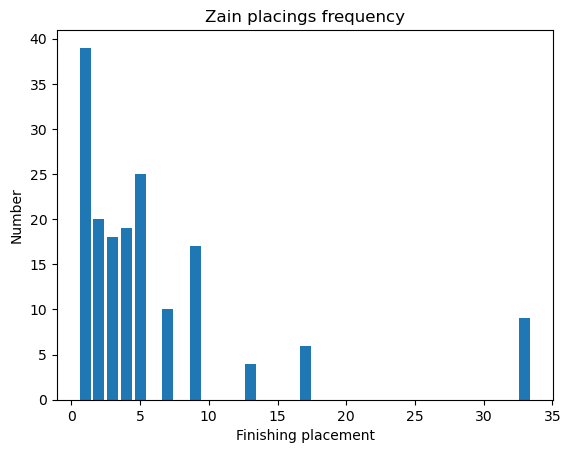

In [82]:
import json
zain = players_df.iloc[2]
zain_placings = zain['placings']
zain_placings_list = json.loads(zain_placings)
print(zain_placings_list[-2])
placings = np.array([tournament['placing'] for tournament in zain_placings_list])
unique, count = np.unique(placings,return_counts=True)
print(unique)
plt.bar(unique[:10],count[:10])
plt.title('Zain placings frequency')
plt.xlabel('Finishing placement')
plt.ylabel('Number')

In [80]:
n = -2
print(zain_placings_list[n]['key'])
print(zain)
print(type(sets_df['tournament_key'][1]))
print(sets_df.columns)
tourmanent = sets_df[sets_df['tournament_key'] == zain_placings_list[n]['key']]
# Correct way to filter the DataFrame
zain_tournament = tourmanent[
    (tourmanent['p1_id'] == zain['player_id']) | (tourmanent['p2_id'] == zain['player_id'])
]
zain_tournament



get-on-my-level-x-canadian-fighting-game-championships__super-smash-bros-melee-singles
game                                                      melee
player_id                                                  6126
tag                                                        Zain
all_tags                                 ["Zain", "DontTestMe"]
prefixes                                                 ["PG"]
social                                 {"twitter": ["PG_Zain"]}
country                                           United States
state                                                        VA
region                                                         
c_country                                                    US
c_state                                                      CA
c_region                                            Los Angeles
placings      [{"key": "mdva-invitational-2017-(challonge-mi...
characters    {"melee/marth": 1065, "melee/pichu": 1, "melee...
alias            

,key,game,tournament_key,winner_id,p1_id,p2_id,p1_score,p2_score,location_names,bracket_name,bracket_order,set_order,best_of,game_data
1748953,gg__74831052,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,2208447,3,0,"[""W2"", ""Winners 2"", ""Winners Round 2""]",Pools,1,J,3.0,[]
1748961,gg__74831060,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,1920510,3,0,"[""WQF"", ""Winners Quarters"", ""Winners Quarter-F...",Pools,1,R,3.0,[]
1748965,gg__74831064,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,503654,3,0,"[""WSF"", ""Winners Semis"", ""Winners Semi-Final""]",Pools,1,V,3.0,[]
1750284,gg__74858266,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,7612,3,0,"[""W1"", ""Winners 1"", ""Winners Round 1""]",Top 128,2,A,3.0,[]
1750292,gg__74858274,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,13748,3,0,"[""WQF"", ""Winners Quarters"", ""Winners Quarter-F...",Top 128,2,I,3.0,[]
1750396,gg__74893919,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,282043,3,1,"[""W1"", ""Winners 1"", ""Winners Round 1""]",Top 32,3,E,3.0,[]
1750402,gg__74893925,melee,get-on-my-level-x-canadian-fighting-game-champ...,16105,6126,16105,2,3,"[""WQF"", ""Winners Quarters"", ""Winners Quarter-F...",Top 32,3,K,3.0,[]
1750427,gg__74893987,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,1028,3,2,"[""L4"", ""Losers 4"", ""Losers Round 4""]",Top 32,3,AO,3.0,[]
1750431,gg__74899347,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,16105,6126,2,3,"[""GF"", ""Grand Final"", ""Grand Final""]",Top 8,4,0_D,3.0,[]
1750432,gg__74899348,melee,get-on-my-level-x-canadian-fighting-game-champ...,6126,6126,16105,3,1,"[""GFR"", ""GF Reset"", ""Grand Final Reset""]",Top 8,4,0_E,3.0,[]
